In [13]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression


# Import csv data 
Biz_df = pd.read_csv("Raw_Data/BusinessAnalyst.csv")
Biz_df.head() 

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True


In [14]:
# check for null values
Biz_df.isnull()

# data info
Biz_df.info()

# get descriptive statistics
Biz_df.describe()

# get the number of row and columns 
Biz_df.shape

# check the columns 
Biz_df.columns

# drop null values
#Biz_df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 0 to 4091
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4092 non-null   object
 1   index              4092 non-null   object
 2   Job Title          4092 non-null   object
 3   Salary Estimate    4092 non-null   object
 4   Job Description    4092 non-null   object
 5   Rating             4092 non-null   object
 6   Company Name       4092 non-null   object
 7   Location           4092 non-null   object
 8   Headquarters       4092 non-null   object
 9   Size               4092 non-null   object
 10  Founded            4092 non-null   object
 11  Type of ownership  4092 non-null   object
 12  Industry           4092 non-null   object
 13  Sector             4092 non-null   object
 14  Revenue            4092 non-null   object
 15  Competitors        3692 non-null   object
 16  Easy Apply         3692 non-null   object


Index(['Unnamed: 0', 'index', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Easy Apply'],
      dtype='object')

In [15]:
# Cleaning and replacing some characters and numerics 
Biz_df['Avg_Salary'] = Biz_df['Salary Estimate'].str.replace(r'\(Glassdoor est.\)','', regex= True)
Biz_df['Avg_Salary'] = Biz_df['Avg_Salary'].str.replace(r'\(Employer est.\)','', regex= True)
Biz_df['Avg_Salary'] = Biz_df['Avg_Salary'].str.replace('$','')
Biz_df['Avg_Salary'] = Biz_df['Avg_Salary'].str.replace('K','')
comdf = Biz_df['Company Name'] = Biz_df['Company Name'].str.replace('\d+', '', regex=True)
comdf['Company Name'] = Biz_df['Company Name'].str.replace('\n.', '')


/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_30807/4138319908.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Biz_df['Avg_Salary'] = Biz_df['Avg_Salary'].str.replace('$','')
/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_30807/4138319908.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  comdf['Company Name'] = Biz_df['Company Name'].str.replace('\n.', '')


In [16]:
# split the numbers in order to do the average 
Biz_df['Avg_Salary'].str.split('-')
Biz_df['Avg_Salary']= Biz_df['Avg_Salary'].str.split('-')

# create function that will return the average
def salary_average(x):
    if len(x) == 1:
        value = x[0]
    else: 
        value =((0 if x[0] == '' else float(x[0]))+ float(x[1])/len(x))
    return value


# using the apply method to get the avg 
Biz_df['Avg_Salary'] = Biz_df['Avg_Salary'].apply(salary_average)
Biz_df['Avg_Salary']

Biz_df.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Avg_Salary
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n.,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1,107.0
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n.,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True,107.0
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n.,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1,107.0
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n.,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1,107.0
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n.,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True,107.0


In [17]:
Biz_df_clean = Biz_df.drop(labels=["Unnamed: 0", "index", "Job Description", 'Sector'], axis=1)
Biz_df_clean.columns = ["Job Title", "Salary Estimate", "Rating", "Company Name", "Location", "Headquarters", "Size", "Founded", "Type of ownership", "Industry", "Revenue", "Competitors", "Easy Apply", "Salary_Estimate_cleaned"]

Biz_df_clean['Company Name']= Biz_df_clean['Company Name'].str.replace('\n.', '', regex= True)

# Replace all the -1 or -1.0 or '-1' to NaN in all columns 
Biz_df_clean['Easy Apply'] = Biz_df_clean['Easy Apply'].replace('True',1)
Biz_df_clean=Biz_df_clean.replace(-1,np.nan)
Biz_df_clean=Biz_df_clean.replace('-1.0',np.nan)
Biz_df_clean=Biz_df_clean.replace('-1',np.nan) 

# rename salary_estimate_cleaned to avg salary 
Biz_df_clean.rename(columns={"salary_Estimate_cleaned":"Avg_salary"}, inplace= True)

# Split salary into two columns min salary and max salary.
Biz_df_clean['Min_Salary'],Biz_df_clean['Max_Salary']= Biz_df_clean['Salary Estimate'].str.split('-').str
Biz_df_clean['Max_Salary'] = Biz_df_clean['Max_Salary'].str.replace(r'\(Glassdoor est.\)','', regex= True)
Biz_df_clean['Max_Salary'] = Biz_df_clean['Max_Salary'].str.replace(r'\(Employer est.\)','', regex= True)
Biz_df_clean['Min_Salary']= Biz_df_clean['Min_Salary'].str.replace('$','')
Biz_df_clean['Min_Salary'] = Biz_df_clean['Min_Salary'].str.replace('K','')
Biz_df_clean['Max_Salary']= Biz_df_clean['Max_Salary'].str.replace('$','')
Biz_df_clean['Max_Salary'] = Biz_df_clean['Max_Salary'].str.replace('K','')


Biz_df_clean['Revenue'] = Biz_df_clean['Revenue'].str.replace(r'\(billion\)','', regex= True)
Biz_df_clean['Revenue'] = Biz_df_clean['Revenue'].str.replace(r'\((USD)\)','', regex= True)
Biz_df_clean['Revenue']= Biz_df_clean['Revenue'].str.replace('$','')
Biz_df_clean['Revenue'] = Biz_df_clean['Revenue'].str.replace('to','')
Biz_df_clean['Revenue'] = Biz_df_clean['Revenue'].replace('Unknown / Non-Applicable',np.nan)


Biz_df_clean.head() 


/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_30807/2420339062.py:16: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Biz_df_clean['Min_Salary'],Biz_df_clean['Max_Salary']= Biz_df_clean['Salary Estimate'].str.split('-').str
/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_30807/2420339062.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Biz_df_clean['Min_Salary']= Biz_df_clean['Min_Salary'].str.replace('$','')
/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_30807/2420339062.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Biz_df_clean['Max_Salary']= Biz_df_clean['Max_Salary'].str.replace('$',

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Revenue,Competitors,Easy Apply,Salary_Estimate_cleaned,Min_Salary,Max_Salary
0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),3.9,Memorial Sloan-Kettering,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,2 5 billion,"Mayo Clinic, The Johns Hopkins Hospital, MD An...",NaN,107.0,56,102
1,Business Analyst,$56K-$102K (Glassdoor est.),3.8,Paine Schwartz Partners,"New York, NY","New York, NY",1 to 50 employees,NaN,Company - Private,Venture Capital & Private Equity,NaN,NaN,1.0,107.0,56,102
2,Data Analyst,$56K-$102K (Glassdoor est.),3.6,Asembia,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,5 10 million,NaN,NaN,107.0,56,102
3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),3.6,BD,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,10+ billion,"Abbott, Siemens, Baxter",NaN,107.0,56,102
4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),3.4,Rubicon Project,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,100 500 million,"PubMatic, AppNexus, Index Exchange",1.0,107.0,56,102


In [18]:
# check for values in rating 
Biz_df_clean['Rating'].value_counts(ascending=True) 

rating_clean = ['-1.0','Jacksonville, FL','Orange Park, FL','Jacksonville Beach, FL',
            'Mayport, FL', 'Ponte Vedra Beach, FL', 'Fleming Island, FL']

def clean_rating(x):
    if x in rating_clean:
        return np.nan
    else:
        return x 

Biz_df_clean['Rating'].apply(clean_rating) 


0       3.9
1       3.8
2       3.6
3       3.6
4       3.4
       ... 
4087    NaN
4088    NaN
4089    NaN
4090    NaN
4091    NaN
Name: Rating, Length: 4092, dtype: object

In [19]:
# check for values in rating 
Biz_df_clean['Rating'].value_counts(ascending=True) 

rating_clean = ['-1.0','Jacksonville, FL','Orange Park, FL','Jacksonville Beach, FL',
            'Mayport, FL', 'Ponte Vedra Beach, FL', 'Fleming Island, FL']

def clean_rating(x):
    if x in rating_clean:
        return np.nan
    else:
        return x 

Biz_df_clean['Rating'].apply(clean_rating) 

#Biz_df_clean['Rating'] = Biz_df_clean['Rating'].astype(float)



0       3.9
1       3.8
2       3.6
3       3.6
4       3.4
       ... 
4087    NaN
4088    NaN
4089    NaN
4090    NaN
4091    NaN
Name: Rating, Length: 4092, dtype: object

<AxesSubplot: >

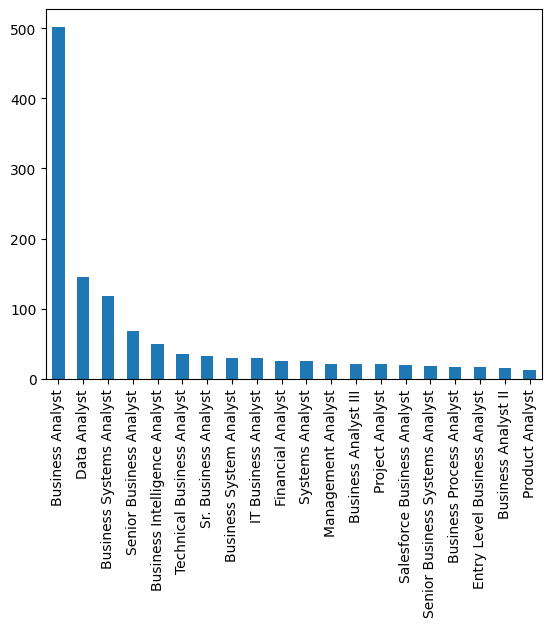

In [20]:
Biz_df['Job Title'].value_counts()
Biz_df['Job Title'].value_counts(normalize=True)[:20]
Biz_df['Job Title'].value_counts()[:20].plot(kind='bar') 

In [21]:
Biz_df.isnull().sum()
Biz_df[(Biz_df['Competitors'].isnull()) & (Biz_df['Easy Apply'].isnull())].shape 

(400, 18)

In [22]:
# Convert clean data into csv file
Biz_df_clean.to_csv('data/clean_data.csv', index = False) 

OSError: Cannot save file into a non-existent directory: 'data'

<AxesSubplot: xlabel='Salary_Estimate_cleaned', ylabel='Count'>

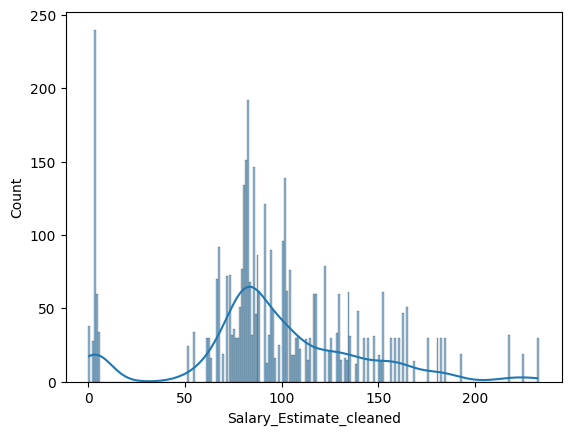

In [ ]:
sns.histplot(Biz_df_clean['Salary_Estimate_cleaned'], kde= True, bins= 100) 


<AxesSubplot: >

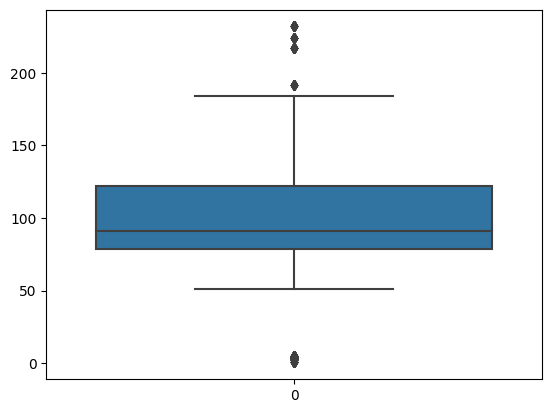

In [ ]:
sns.boxplot(Biz_df_clean['Salary_Estimate_cleaned'])
